In [15]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
import cv2
from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns

from shiftlab_ocr.doc2text.reader import Reader

In [16]:
h, w, _ = cv2.imread("train_RZHD_TrudovieKnizhki/29/29_1.jpg").shape

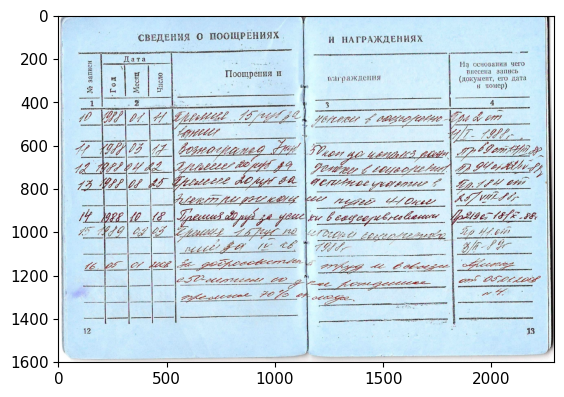

In [17]:
plt.imshow(cv2.imread("train_RZHD_TrudovieKnizhki/29/29_1.jpg")[:, :]);

In [18]:
reader = Reader()
img = cv2.imread("train_RZHD_TrudovieKnizhki/29/29_1.jpg")[int(h * 0.26):, :int(w * 0.24)]
cv2.imwrite('test.jpg', img)

recognizer weights has loaded from c:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\shiftlab_ocr\doc2text\ocr_transformer_4h2l_simple_conv_64x256.pt
requirements: C:\Users\Egor\AppData\Local\Programs\Python\Python310\Lib\site-packages\shiftlab_ocr\doc2text\yolov5\requirements.txt not found, check failed.


True

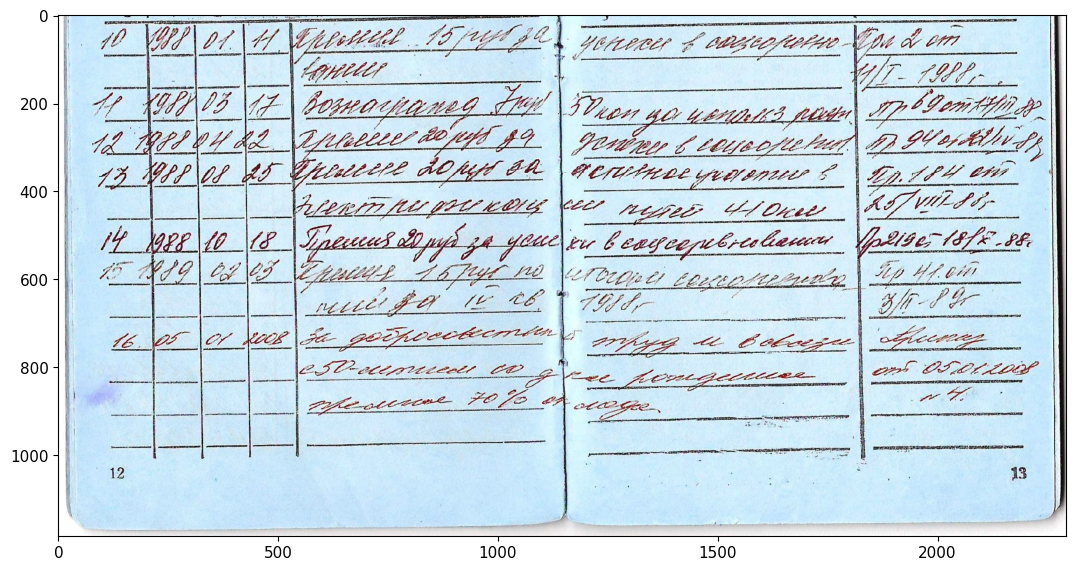

In [27]:
plt.subplots(figsize=[13, 15])
plt.imshow(cv2.imread("train_RZHD_TrudovieKnizhki/29/29_1.jpg")[int(h * 0.26):, :])

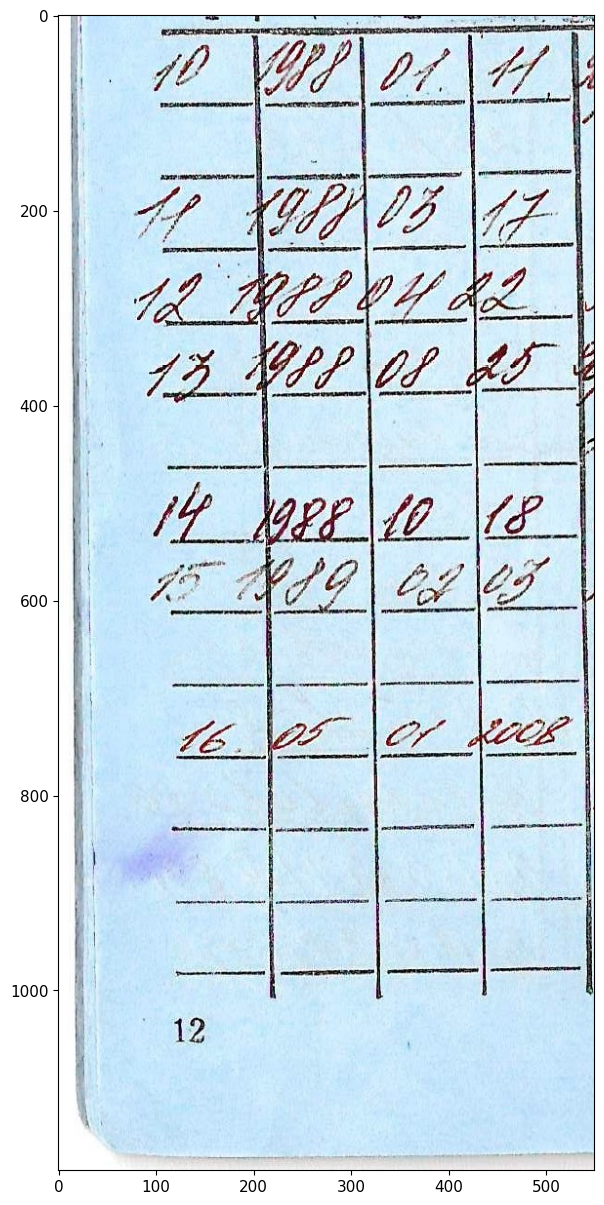

In [19]:
plt.subplots(figsize=[13, 15])
plt.imshow(cv2.imread("train_RZHD_TrudovieKnizhki/29/29_1.jpg")[int(h * 0.26):, :int(w * 0.24)])

In [20]:
result = reader.doc2text("test.jpg")

In [21]:
def calculate_y_distances(boxes: list, y_max: float) -> list:
    # Создаем список для хранения расстояний
    distances = []
    
    # Проходим по списку box-ов, рассчитывая расстояния между последовательными парами
    for i in range(len(boxes) - 1):
        # Первый box
        box1_top_y = boxes[i][0][1]
        box1_bottom_y = boxes[i][1][1]

        # Второй box
        box2_top_y = boxes[i + 1][0][1]
        box2_bottom_y = boxes[i + 1][1][1]

        # Расчет расстояния между нижней границей первого box и верхней второго
        if box1_bottom_y < box2_top_y:
            distance = box2_top_y - box1_bottom_y
        elif box2_bottom_y < box1_top_y:
            distance = box1_top_y - box2_bottom_y
        else:
            # Box-ы перекрываются по y
            distance = 0
        if distance > 0:
            # Добавляем расстояние в список
            distances.append((box1_top_y, box2_top_y))
    distances.append((boxes[-1][0][1], y_max))
    return distances

[[90.19766235351562, 29.858707427978516], [158.2107696533203, 82.23281860351562]]
10 True True
[[205.29954528808594, 18.61149787902832], [299.3912658691406, 79.07688903808594]]
198 True True
[[326.59906005859375, 28.94841766357422], [408.2986755371094, 79.84892272949219]]
01. False True
[[435.00384521484375, 20.86008644104004], [506.5728454589844, 81.2818374633789]]
11 True True
[[76.69420623779297, 175.54579162597656], [147.8729705810547, 226.02381896972656]]
11 True True
[[189.24046325683594, 173.88330078125], [291.63006591796875, 221.9163360595703]]
191 True True
[[201.9708251953125, 166.09996032714844], [377.5684509277344, 226.404296875]]
98705 True True
[[323.3629455566406, 167.1656036376953], [395.4246520996094, 228.31480407714844]]
05 True True
[[431.96270751953125, 170.1675262451172], [511.8212890625, 222.6047821044922]]
17 True True
[[76.19014739990234, 259.2975158691406], [150.91958618164062, 310.0924987792969]]
12 True True
[[173.37359619140625, 249.54933166503906], [291.319

C:\Users\Egor\AppData\Local\Temp\ipykernel_13084\4228072733.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


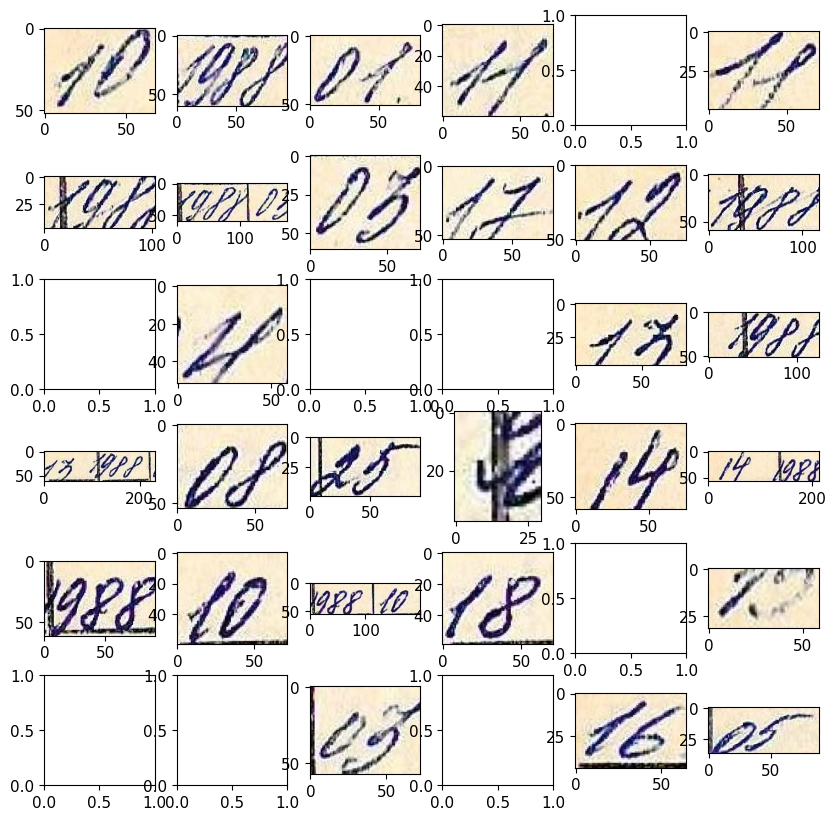

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

images = result[1]
N = 48  # how many crops to show
n = int(N ** (0.5))
k = 0
dt = result[0].split()
dt_box = []
f, axarr = plt.subplots(n,n,figsize=(10,10))
for i in range(n):
    for j in range(n):
        # print(dt[k], dt[k].isdigit(), dt[k].replace('.', '').replace(')', '').isdigit())
        if dt[k].replace('.', '').replace(')', '').isdigit():
            axarr[i, j].imshow(images[k].img)
            dt_box.append(images[k].points)
            print(images[k].points)
            print(dt[k], dt[k].isdigit(), dt[k].replace('.', '').replace(')', '').isdigit())
        k += 1
f.show()
print(dt_box)

In [25]:
for i in calculate_y_distances(dt_box, img.shape[0]):
    print(i)

(20.86008644104004, 175.54579162597656)
(170.1675262451172, 259.2975158691406)
(250.2474822998047, 335.21807861328125)
(341.7716979980469, 474.1774597167969)
(476.8173828125, 574.8814697265625)
(545.7362060546875, 718.5145874023438)
(714.450439453125, 1185)


In [48]:
def get_data_columns(img: np.ndarray, string_cords: list, ocr_modul: Reader) -> dict:
    data = {
        'number_data': [],
        'grants_or_work': [],
        'description': []
    }

    for elem in string_cords:
        img_tmp = img[int(round(elem[0])):int(round(elem[1])), :]
        col_1, col_2, col_3 = (img_tmp[:, :int(w * 0.24)],
                       img_tmp[:, int(w * 0.22):int(w * 0.8)],
                       img_tmp[:, int(w * 0.78):])
        cv2.imwrite('col_1.jpg', col_1)
        cv2.imwrite('col_2.jpg', col_2)
        cv2.imwrite('col_3.jpg', col_3)
        result_1, result_2, result_3 = (ocr_modul.doc2text("col_1.jpg"), 
                                        ocr_modul.doc2text("col_2.jpg"), 
                                        ocr_modul.doc2text("col_3.jpg"))
        data['number_data'].append(result_1[0])
        data['grants_or_work'].append(result_2[0])
        data['description'].append(result_3[0])
    return data

In [49]:
img = cv2.imread("train_RZHD_TrudovieKnizhki/29/29_1.jpg")[int(h * 0.26):, :int(w * 0.24)]
cv2.imwrite('test.jpg', img)

True

In [50]:
result = reader.doc2text("test.jpg")

In [51]:
result[0]

'10 198 01. 11 раземление 11 191 98705 05 17 12 7981 Ф. 11 до2 А 17 1987 17 198 08 25 4 14 14 198 988 10 988-10 18 объект 1.к. 19 СУ 07 07.05 16 05 01 ход 01 2008 2012 12 '

In [52]:
images = result[1]
N = 48  # how many crops to show
n = int(N ** (0.5))
k = 0
dt = result[0].split()
dt_box = []
for i in range(n):
    for j in range(n):
        if dt[k].replace('.', '').replace(')', '').isdigit():
            dt_box.append(images[k].points)
        k += 1
print(dt_box)

[[[90.19766235351562, 29.858707427978516], [158.2107696533203, 82.23281860351562]], [[205.29954528808594, 18.61149787902832], [299.3912658691406, 79.07688903808594]], [[326.59906005859375, 28.94841766357422], [408.2986755371094, 79.84892272949219]], [[435.00384521484375, 20.86008644104004], [506.5728454589844, 81.2818374633789]], [[76.69420623779297, 175.54579162597656], [147.8729705810547, 226.02381896972656]], [[189.24046325683594, 173.88330078125], [291.63006591796875, 221.9163360595703]], [[201.9708251953125, 166.09996032714844], [377.5684509277344, 226.404296875]], [[323.3629455566406, 167.1656036376953], [395.4246520996094, 228.31480407714844]], [[431.96270751953125, 170.1675262451172], [511.8212890625, 222.6047821044922]], [[76.19014739990234, 259.2975158691406], [150.91958618164062, 310.0924987792969]], [[173.37359619140625, 249.54933166503906], [291.3197937011719, 309.9669189453125]], [[340.9046325683594, 250.2474822998047], [399.9531555175781, 302.0231018066406]], [[82.256195

In [53]:
img.shape[0]

1185

In [54]:
calculate_y_distances(dt_box, img.shape[0])

[(20.86008644104004, 175.54579162597656),
 (170.1675262451172, 259.2975158691406),
 (250.2474822998047, 335.21807861328125),
 (341.7716979980469, 474.1774597167969),
 (476.8173828125, 574.8814697265625),
 (545.7362060546875, 718.5145874023438),
 (714.450439453125, 1185)]

In [55]:
get_data_columns(
    img=cv2.imread("train_RZHD_TrudovieKnizhki/29/29_1.jpg")[int(h * 0.26):, :],
    string_cords=calculate_y_distances(dt_box, img.shape[0]),
    ocr_modul=reader
)

{'number_data': ['18 10 т 10 01 41 случайноственной 10 0 не РАЗВЕРНУТМ ОТВЕТОМ 1 ',
  '0 д.т. л. а 11 ин 00 ил А. ',
  '10 пр а Д. по 1 в по очое Также (в се РАЗВЕРНУТМ ОТВЕТОМ ',
  'А.А. на А.В Д и Р 1) 2 1 их Д. дей 2) 12. подгрезиона при ',
  'сир одо 16 1 о 18 в о ла т Код региона о на задания ел В е А а м. ег. 1 ',
  'участвой В не тог тво 19 да а 12 В 1 с п 1-й он при РАЗВЕРНУТМ ОТВЕТОМ РАЗВЕРНУТМ ОТВЕТОМ ',
  '16 05 от ходе РАЗВЕРНУТМ ОТВЕТОМ Название предмета РАЗВЕРНУТМ ОТВЕТОМ РАЗВЕРНУТМ ОТВЕТОМ 18 '],
 'grants_or_work': ['неоние 2 сп. 15 руба испехся соцесорено де Анеля 12 ',
  'Вознагражд Лин) 50 кон це на исполез пост ',
  'трем 20. до оспехс соцеорен есть ',
  'уремые огру для техное участие 1) на сеся путей ил 4 Оны ',
  'Премия до на усли ки соцесоревнова от ',
  'и к реше 5 трус по того 2) соли его солет числ 46 507 1 с. св и 26 1916 ',
  'да добросовество труд ли в связи с Б с50-летики сто каке Кождение премное 70 7015 от котор моде т.к. т.к. '],
 'description': ['то А

In [57]:
res = reader.doc2text("col_1.jpg")

In [58]:
res[0]

'16 05 от ходе РАЗВЕРНУТМ ОТВЕТОМ Название предмета РАЗВЕРНУТМ ОТВЕТОМ РАЗВЕРНУТМ ОТВЕТОМ 18 '

16 True True
[[119.84341430664062, 11.895404815673828], [192.48855590820312, 38.18301010131836]]
05 True True
[[217.14065551757812, 6.7195963859558105], [293.8866271972656, 38.025054931640625]]
от False False
[[332.3280944824219, 3.657954692840576], [402.3653259277344, 35.720516204833984]]
ходе False False
[[417.6071472167969, 4.222253799438477], [526.8129272460938, 34.752708435058594]]
РАЗВЕРНУТМ False False
[[111.42572021484375, 111.43669128417969], [211.32334899902344, 128.7506866455078]]
ОТВЕТОМ False False
[[223.9102783203125, 113.88329315185547], [319.5343322753906, 129.68231201171875]]
Название False False
[[116.40862274169922, 185.630615234375], [209.25645446777344, 205.1145477294922]]
предмета False False
[[329.23529052734375, 257.4064636230469], [432.28558349609375, 274.72113037109375]]
РАЗВЕРНУТМ False False
[[110.79296112060547, 315.5582580566406], [167.7489471435547, 339.80096435546875]]
ОТВЕТОМ False False


IndexError: list index out of range

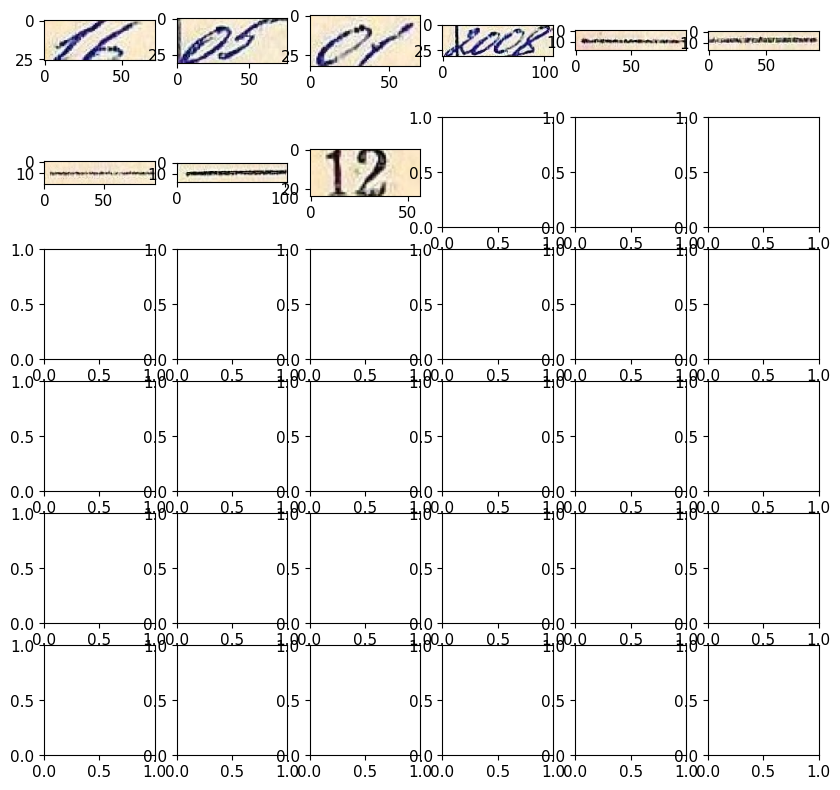

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

images = res[1]
N = 48  # how many crops to show
n = int(N ** (0.5))
k = 0
dt = res[0].split()
dt_box = []
f, axarr = plt.subplots(n,n,figsize=(10,10))
for i in range(n):
    for j in range(n):
        print(dt[k], dt[k].isdigit(), dt[k].replace('.', '').replace(')', '').isdigit())
        # if dt[k].replace('.', '').replace(')', '').isdigit():
        axarr[i, j].imshow(images[k].img)
        dt_box.append(images[k].points)
        print(images[k].points)
        # print(dt[k], dt[k].isdigit(), dt[k].replace('.', '').replace(')', '').isdigit())
        k += 1
f.show()
print(dt_box)